In [16]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import importlib
import os
import sys

path_ = os.path.abspath(os.path.join('..', '00_utils_training'))

if path_ not in sys.path:
    sys.path.append(path_)

import run_train_toy
importlib.reload(run_train_toy)
TrainerToy = run_train_toy.TrainerToy

import analyse_results
reload_module = analyse_results.reload_module

Graphs = reload_module('analyse_results', 'Graphs')
Results = reload_module('analyse_results', 'Results')

### Regularization

In [5]:
fn = '2024-08-15_12-41-10_jax_reg.pkl'

with open(f'results/{fn}', 'rb') as file:
    results_reg_ho = pickle.load(file)
    
def extract_metrics(results_dict):
    time_elapsed, mse_train, mse_test = [], [], []
    for key, value in results_dict.items():
        time_elapsed.append(value['time_elapsed'])
        mse_train.append(value['mse_train'].item())
        mse_test.append(value['mse_test'].item())
    return time_elapsed, mse_train, mse_test

In [6]:
time_elapsed_ho, mse_train_ho, mse_test_ho = extract_metrics(results_reg_ho)

df = pd.DataFrame({
    'Reg Strength': results_reg_ho.keys(),
    'Time Elapsed HO': time_elapsed_ho,
    'MSE Train HO': mse_train_ho,
    'MSE Test HO': mse_test_ho
})

display(df.T)

,0,1,2,3,4,5,6,7
Reg Strength,0,1e-06,1e-05,0.0001,0.001,0.01,0.1,1
Time Elapsed HO,4.886813,6.083797,4.76736,4.742946,6.147441,4.505516,4.431655,5.879815
MSE Train HO,0.001406,0.001406,0.001401,0.001355,0.001045,0.034854,0.511213,0.520404
MSE Test HO,0.003212,0.00321,0.003206,0.00304,0.002383,0.064625,0.779294,0.831041


## Tolerances

In [7]:
fn = 'diffrax_2024-08-19_19-14-49_tolerances.pkl'

with open(f'results/{fn}', 'rb') as file:
    results_reg_ho = pickle.load(file)

time_elapsed_ho, mse_train_ho, mse_test_ho = extract_metrics(results_reg_ho)

df = pd.DataFrame({
    'key': results_reg_ho.keys(),
    'time_elapsed': time_elapsed_ho,
    'mse_train': mse_train_ho,
    'mse_test': mse_test_ho
})

df['rtol'] = [v[0] for v in df['key']]
df['atol'] = [v[1] for v in df['key']]
df.drop(columns=['key'], inplace=True)
df.head()

,time_elapsed,mse_train,mse_test,rtol,atol
0,4.962230,106.385300,87.736899,0.1,1.000000e-03
1,4.961151,4.365494,3.473221,0.1,1.000000e-04
2,4.833733,3.794204,24.709913,0.1,1.000000e-05
3,4.893616,10.680491,12.076700,0.1,1.000000e-06
4,7.494311,4.068367,15.213799,0.1,1.000000e-07


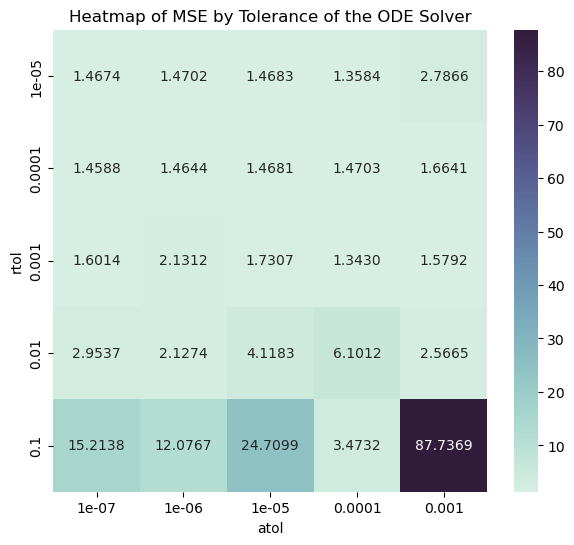

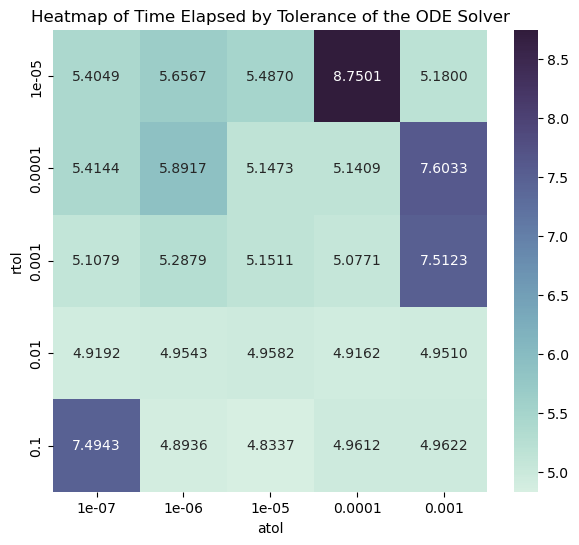

In [8]:
pivot_table = df.pivot(index='rtol', columns=['atol'], values='mse_test')
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, light=0.9)
                             
plt.figure(figsize=(7, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap=cmap, annot_kws={'size': 10})
plt.title('Heatmap of MSE by Tolerance of the ODE Solver')
plt.show()

pivot_table = df.pivot(index='rtol', columns=['atol'], values='time_elapsed')
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, light=0.9)
                             
plt.figure(figsize=(7, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap=cmap, annot_kws={'size': 10})
plt.title('Heatmap of Time Elapsed by Tolerance of the ODE Solver')
plt.show()

## Activation Function 

In [9]:
fn = 'diffrax_2024-08-20_15-39-33_act_func.pkl'

with open(f'results/{fn}', 'rb') as file:
    activation_function = pickle.load(file)

In [15]:
Results = reload_module('analyse_results', 'Results')
Results.key_sample(activation_function)
df = Results.parse_results(activation_function, ['activation_function', 'data_type'])
df[df['data_type'] == 'vdp']

,activation_function,data_type,time_elapsed,mse_train,mse_test
0,tanh,vdp,6.258872,0.44568628520438586,3.665575538412047
3,relu,vdp,5.989813,3.167202744143994,3.8922328909359214
6,sigmoid,vdp,6.159822,0.6652708419940347,9.48913761932777
